In [1]:
import os

from ml.eval import eval_model
from ml.models.MySimpleCNN_Feit import MySimpleCNNInceptionModuleV2Small

print(os.getcwd())
os.chdir('/home/jelinek/recetox/')

from ml.pipeline import FeitDataPipeline
from cfg import *


name = "MySimpleCNN-inception-v2-small"

/home/jelinek/recetox/src/notebooks


In [2]:
pipeline = MySimpleCNNInceptionModuleV2Small(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                                      valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

Model: "MySimpleCnnFewerLayers"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 3)  0           input_1[0][0]                    
_____________________________________________________________________________

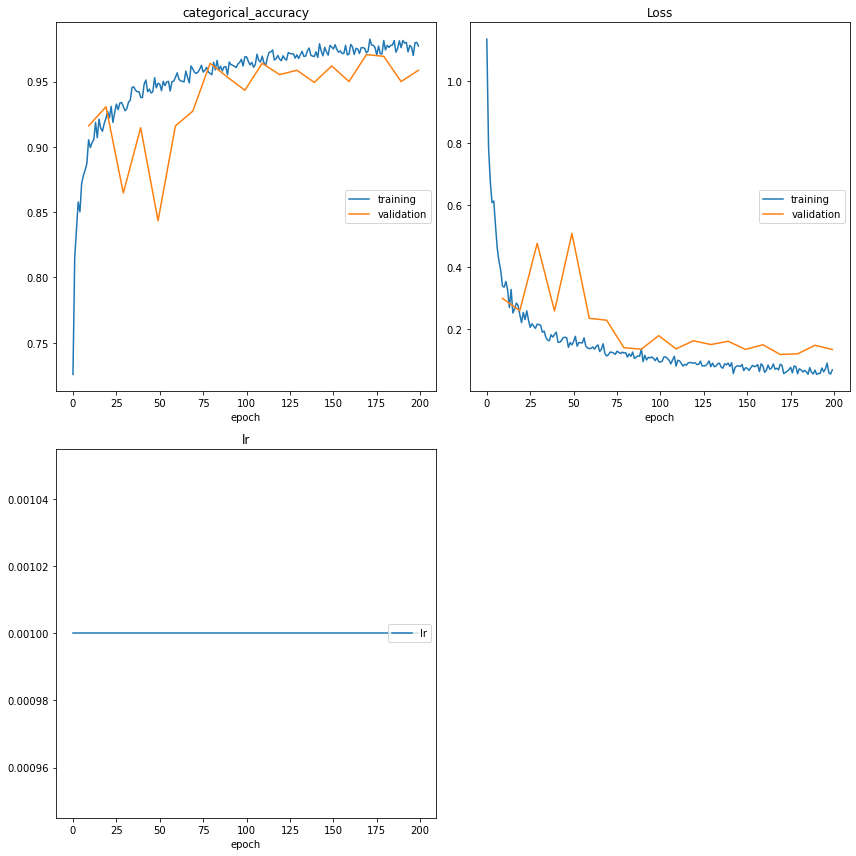

categorical_accuracy
	training         	 (min:    0.726, max:    0.983, cur:    0.977)
	validation       	 (min:    0.843, max:    0.971, cur:    0.959)
Loss
	training         	 (min:    0.055, max:    1.134, cur:    0.070)
	validation       	 (min:    0.120, max:    0.509, cur:    0.136)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
94/94 [==============================] - 5s 49ms/step - loss: 0.1357 - categorical_accuracy: 0.9587

In [3]:
pipeline.execute_pipeline(perform_validation=True, perform_test_segmentation=False)

In [4]:
pipeline.save_pipeline()

In [5]:
eval_model(pipeline.model,
           pipeline.get_data_loader_validation(),
           print_confusion_matrix=True,
           save_misclassified=True)

Found 1501 images belonging to 12 classes.
94/94 [==============================] - 5s 50ms/step - loss: 0.1357 - categorical_accuracy: 0.9587

In [6]:
pipeline = FeitDataPipeline.load_pipeline(pipeline_name=name)

In [7]:
#file = Path('data/Feit_colon-annotation_valid/ns-adenoca-colon-3043-2019-20x-he-a1/ns-adenoca-colon-3043-2019-20x-he-a1.tiff')
#file = Path('data/Feit_colon-annotation_valid/ns-adenoca-colon-15071-2019-20x-he-4/ns-adenoca-colon-15071-2019-20x-he-4.tiff')
#file = Path('data/Feit_colon-annotation_valid/ns-adenoca-colon-15072-2019-20x-he-a2/ns-adenoca-colon-15072-2019-20x-he-a2.tiff')
#file = Path('data/Feit_colon-annotation_valid/ns-adenoca-colon-lupos-15071-2019-20x-he-14/ns-adenoca-colon-lupos-15071-2019-20x-he-14.tiff')
file = Path('data/Feit_colon-annotation_valid/pop-ca-colon-1708-2019-5-20x-he/pop-ca-colon-1708-2019-5-20x-he.tiff')

pipeline.perform_segmentation(file, step=32)


Segmenting file 1 out of 1
Processing region 567 out of 567
Processing image took 18072.061064004898 seconds


In [8]:
path = Path('data/Kather_5000')
from util.data_manipulation_scripts import generate_image_annotation_pairs

tiffs, _ = generate_image_annotation_pairs(Path('data/Feit_colon-annotation_valid/'))
for tiff in tiffs:
    pipeline.perform_segmentation(tiff, step=32)


Segmenting file 1 out of 1
Processing region 120 out of 120
Processing image took 2742.3184974193573 seconds
Segmenting file 1 out of 1
Processing region 255 out of 255
Processing image took 7088.536658525467 seconds
Segmenting file 1 out of 1
Processing region 255 out of 255
Processing image took 6890.287616014481 seconds
Segmenting file 1 out of 1
Processing region 56 out of 56
Processing image took 1854.6013052463531 seconds
Segmenting file 1 out of 1
Processing region 567 out of 567
Processing image took 18032.26105570793 seconds


In [9]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid')

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         256, pipeline.params.class_names)

Processing region 120 out of 120
Processing image took 146.02646136283875 seconds
Processing region 255 out of 255
Processing image took 360.22684717178345 seconds
Processing region 255 out of 255
Processing image took 346.1089208126068 seconds
Processing region 56 out of 56
Processing image took 72.74748659133911 seconds
Processing region 567 out of 567
Processing image took 655.6612567901611 seconds
[[8674   28   51    6    0    3    9    2    0    0  748    6]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   9   34  253    0    0    0   53   40    0    0   13    0]
 [   0    0    0  201    0    0    0    0    0    0    0    0]
 [  29  107   49   22 4322    0    0    0    0    0    0    0]
 [   1    1    4   19    0    5    0    0    0    0    0    0]
 [  11  235   36    9    6    0 1384    0    0    0    1    0]
 [  28  265    2    0    0    0    9 1203    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   26   28    0    1  